---------------------------------
data
    Test 1  Test 2  Admetted  Ones
0    6101   17592         1     1
1    5277    9132         0     1
2    8586    1362         1     1
3   70032   11855         1     1
4   58598   68233         0     1
5   83829   11886         1     1
---------------------------------
result= (array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 68, 4)
accuracy = 41


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10216\2824090875.py:68: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-h))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10216\2824090875.py:77: RuntimeWarning: divide by zero encountered in log
  first= np.multiply(-yj, np.log(sigmoid(xj * thetaj.T)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10216\2824090875.py:77: RuntimeWarning: invalid value encountered in multiply
  first= np.multiply(-yj, np.log(sigmoid(xj * thetaj.T)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10216\2824090875.py:78: RuntimeWarning: divide by zero encountered in log
  second = np.multiply((1-yj) , np.log(1- sigmoid(xj * thetaj.T)))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10216\2824090875.py:78: RuntimeWarning: invalid value encountered in multiply
  second = np.multiply((1-yj) , np.log(1- sigmoid(xj * thetaj.T)))


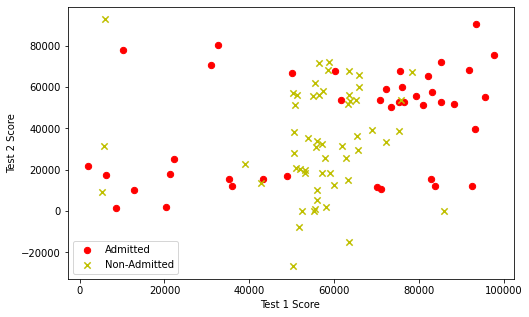

In [19]:
import  numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


path = 'C:\\clasification.txt'

data= pd.read_csv(path, header=None, 
                  names=['Test 1','Test 2','Admetted']) 

prons = data[data['Admetted'].isin([1])]
cons = data[data['Admetted'].isin([0])]

fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(prons['Test 1'], prons['Test 2'],
          s=40 ,c='r', marker='o', label='Admitted')
ax.scatter(cons['Test 1'], cons['Test 2'],
          s=40 ,c='y', marker='x', label='Non-Admitted')

#lebling
ax.legend()
ax.set_xlabel('Test 1 Score ')
ax.set_ylabel('Test 2 Score')



# set x training data and y taget vaiable
x1=data['Test 1']
x2= data['Test 2']

# print('x1:\n',x1.head(6))
# print('x2:\n',x2.head(6))

print('---------------------------------')

#add col wiht 1 value
data.insert(3,'Ones',1)
print('data\n',data.head(6))
print('---------------------------------')

'''
x1+ x1^x2 + x1^2 + x1^3 + x1* x2^2 + x1^4 + x1^3 * x2 +x1^3 * x2 + x1^2 * x2^2 + x1* x2^3
F10=x

F20=x1^x2
F21=x1^3

F30=x1* x2^2 
F31=x1* x2^2 
'''
degree=5
for i in range (1 , degree): # rannge 1,2,3,4
    for j in range(0,i):
        data['F'+str(i) + str(j)]=np.power(x1,i-j)* np.power(x2,j)


data.drop('Test 1', axis=1 , inplace=True)
data.drop('Test 2', axis=1 , inplace=True)

# #convert to numpy array and initiali we thne parameter array theta
# x1=np.array(x1.values)
# x2=np.array(x2.values)
# y=np.array(y.values)
# theta=np.zeros(3) # 3 features 


def sigmoid(h):
    return 1/(1+np.exp(-h))

#cost function

def costReg(thetaj, xj , yj,learningRate):
    thetaj = np.matrix(thetaj)
    xj=np.matrix(xj)
    yj=np.matrix(yj)
    
    first= np.multiply(-yj, np.log(sigmoid(xj * thetaj.T)))
    second = np.multiply((1-yj) , np.log(1- sigmoid(xj * thetaj.T)))
    reg=(learningRate/ 2 * len(xj) ) * np.sum(np.power(thetaj[: , 1:thetaj.shape[1]],2))
    return np.sum( first - second)/ (len(xj))+reg


def gradientReg(thetaG , xG , yG, learningRate):
    thetaG= np.matrix(thetaG)
    xG= np.matrix(xG)
    yG= np.matrix(yG)
    
    parameters = int(thetaG.ravel().shape[1] ) # force theta for being in vertically 1 D array

    grad= np.zeros(parameters)
#     print('graaaaaaaaaaaaaaaaad:',c)

    error = sigmoid(xG * thetaG.T) - yG
    
    for i in range(parameters):
        term = np.multiply( error, xG[:,i])
        if (i==0):
            grad[i]=np.sum(term)/len(xG)
        else:
            grad[i]=(np.sum(term)/len(xG))+((learningRate/len(xG))*thetaG[:,i])
    return grad

# set x training data and y taget vaiable
cols=data.shape[1]
x2=data.iloc[:,1:cols]
y2=data.iloc[:,0:1]
#convert to numpy array and initiali we thne parameter array theta
x2=np.array(x2.values)
y2=np.array(y2.values)
theta2=np.zeros(x2.shape[1])
# print('xxxxxxxx2:\n',x2)
# theta2=np.matrix(x2.shape)

learningRate=100
recost=costReg(theta2,x2,y2,learningRate)

import scipy.optimize as opt

result = opt.fmin_tnc(func= costReg ,x0=theta2,
                 fprime= gradientReg , args=(x2,y2,learningRate))#to get the optimum values
print('result=',result)

#know the degree of the effecincy
def predict(theta , x):
    probabilty = sigmoid( x* theta.T)
    return [1 if x>=0.5 else 0 for x in probabilty]

theta_min = np.matrix(result[0])
predictions = predict(theta_min,x2)
correct = [1 if ((a==1 and b == 1) or
                (a==0 and b==0)) else 0 
          for (a,b) in zip(predictions,y2)]
accuracy=(sum(map(int,correct)) % len(correct))
print('accuracy = {0}'.format(accuracy))